<a href="https://www.kaggle.com/code/aibamayaalvarez/titanic-ensemble-model?scriptVersionId=120528493" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic - Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we will build a predictive model that answers the question: **“what sorts of people were more likely to survive?”**

# Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("cool_r")
# Nice Palettes
# 'brg_r','cool_r', 'gist_rainbow_r', 'plasma_r', 'prism_r', 'rainbow_r','tab10_r'


# First Insights

In [5]:
############ Data Types ###############

print('\n'+'*'*40+'\n'+'TRAIN DATA'+'\n'+'*'*40+'\n')
train.info()
print('\n'+'*'*40+'\n'+'TEST DATA'+'\n'+'*'*40+'\n')
test.info()


****************************************
TRAIN DATA
****************************************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

****************************************
TEST DATA
****************************************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Coun

In [6]:
############ Duplicated data ###############

print('\n'+'*'*40+'\n'+'DUPLICATED VALUES TRAIN DATA'+'\n'+'*'*40+'\n')
print(train.duplicated().sum())
print('\n'+'*'*40+'\n'+'DUPLICATED VALUES TEST DATA'+'\n'+'*'*40+'\n')
print(test.duplicated().sum())


****************************************
DUPLICATED VALUES TRAIN DATA
****************************************

0

****************************************
DUPLICATED VALUES TEST DATA
****************************************

0


In [7]:
############ Missing data ###############

print('\n'+'*'*40+'\n'+'MISSING VALUES TRAIN DATA'+'\n'+'*'*40+'\n')
print(train.isnull().sum())
print('\n'+'*'*40+'\n'+'MISSING VALUES TEST DATA'+'\n'+'*'*40+'\n')
print(test.isnull().sum())


****************************************
MISSING VALUES TRAIN DATA
****************************************

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

****************************************
MISSING VALUES TEST DATA
****************************************

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [8]:
############ Percentage of Missing data ###############

def percMiss(col, df):
    return round(df[col].isnull().sum()/df.shape[0]*100,2)

print('Percentage of missing data')
print(f'Train Data| Age: {percMiss("Age", train)} | Cabin: {percMiss("Cabin", train)} | Embarked: {percMiss("Embarked", train)}')
print(f'Test Data | Age: {percMiss("Age", test)} | Cabin: {percMiss("Cabin", test)} | Fare: {percMiss("Fare", test)}')

Percentage of missing data
Train Data| Age: 19.87 | Cabin: 77.1 | Embarked: 0.22
Test Data | Age: 20.57 | Cabin: 78.23 | Fare: 0.24


In [9]:
train.describe(include='number')

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe(include='number')

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
test.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# EDA

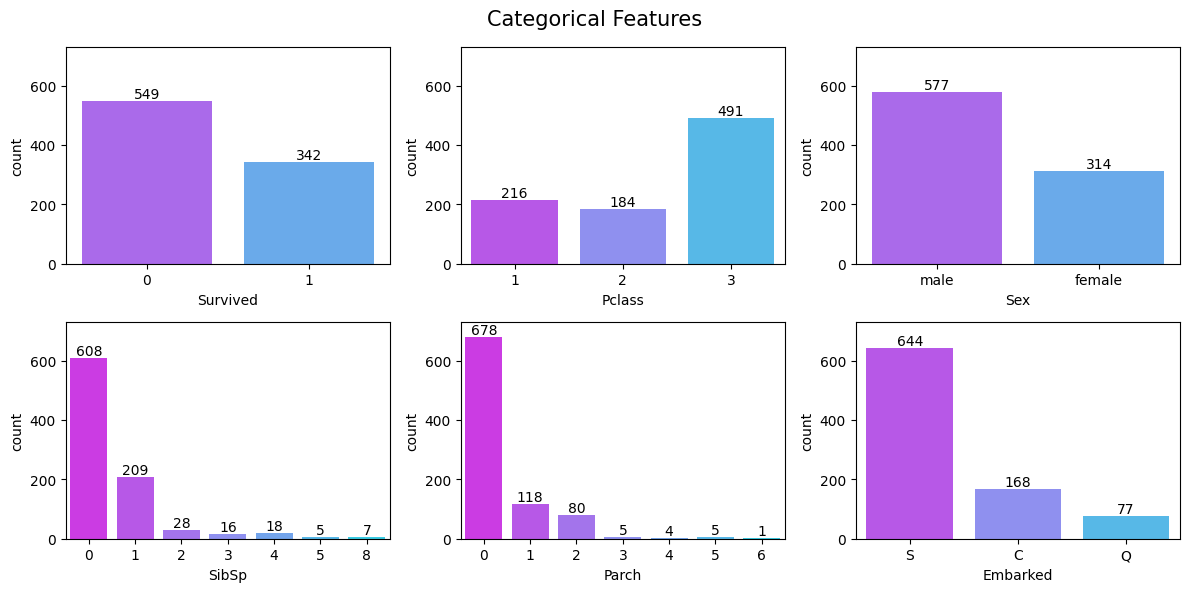

In [13]:
############ Plotting Categorical Features ###############

cat_feat = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

fig, ax = plt.subplots(2, 3, figsize=(12,6), dpi=100)

for idx, feat in enumerate(cat_feat):   
    #count plot
    graph = sns.countplot(x=feat, data=train, ax=ax[idx//3,idx%3], palette='cool_r')
    ax[idx//3,idx%3].set_ylim([0,730])
    for count in graph.containers:
        graph.bar_label(count)
    
plt.suptitle('Categorical Features', fontsize=15)
plt.tight_layout()
plt.show()

In [14]:
# Tickets: People who paid for one or more
for i in range(1,8):
    print(f'Tickets for {i} passenger(s): {(train.Ticket.value_counts() == i).sum()} |\
    {round((train.Ticket.value_counts() == i).sum()/train.shape[0]*100, 2)}%')

Tickets for 1 passenger(s): 547 |    61.39%
Tickets for 2 passenger(s): 94 |    10.55%
Tickets for 3 passenger(s): 21 |    2.36%
Tickets for 4 passenger(s): 11 |    1.23%
Tickets for 5 passenger(s): 2 |    0.22%
Tickets for 6 passenger(s): 3 |    0.34%
Tickets for 7 passenger(s): 3 |    0.34%


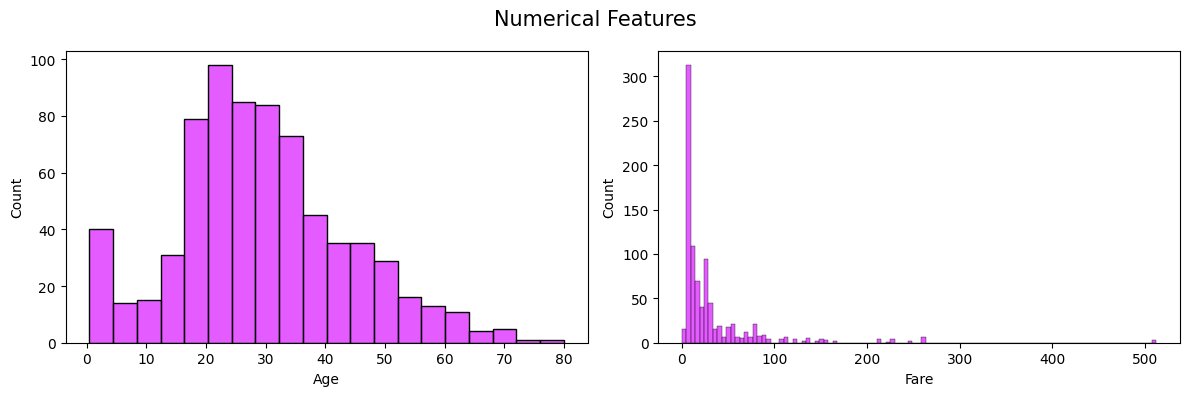

In [15]:
############ Plotting Numerical Features ###############

fig, ax = plt.subplots(1,2, figsize=(12,4), dpi=100)

sns.histplot(x='Age', data=train, ax=ax[0], palette='cool_r')
sns.histplot(x='Fare', data=train, ax=ax[1], palette='cool_r')

plt.suptitle('Numerical Features', fontsize=15)
plt.tight_layout()
plt.show()

#### Dealing With Missing Values

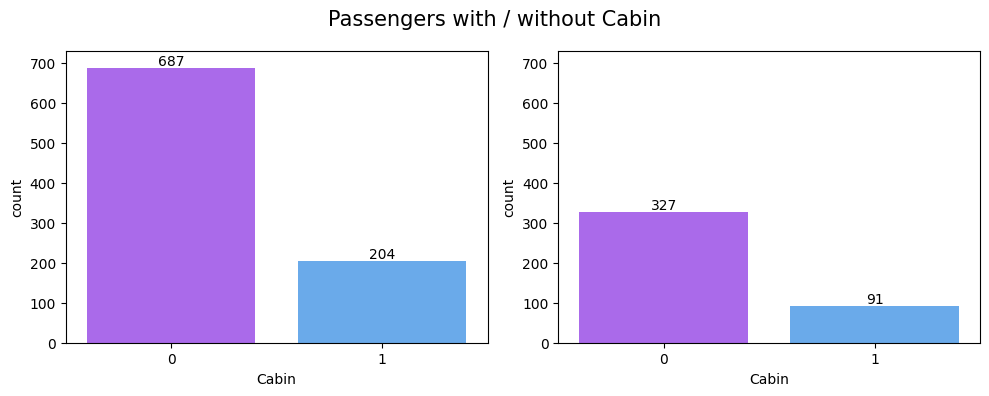

In [16]:
############ Cabin ###############

#Replace the Cabin feature with an encoded one (0: does not have a Cabin, 1: has a Cabin)
train['Cabin'] = np.where(train.Cabin.isna()==False, 1, 0)
test['Cabin'] = np.where(test.Cabin.isna()==False, 1, 0)

fig, ax = plt.subplots(1, 2, figsize=(10,4), dpi=100)

for idx, df in enumerate([train, test]): 
    graph = sns.countplot(x='Cabin', data=df, ax=ax[idx%2], palette='cool_r')
    ax[idx%2].set_ylim([0,730])
    for count in graph.containers:
        graph.bar_label(count)
        
plt.suptitle('Passengers with / without Cabin', fontsize=15)
plt.tight_layout()
plt.show()

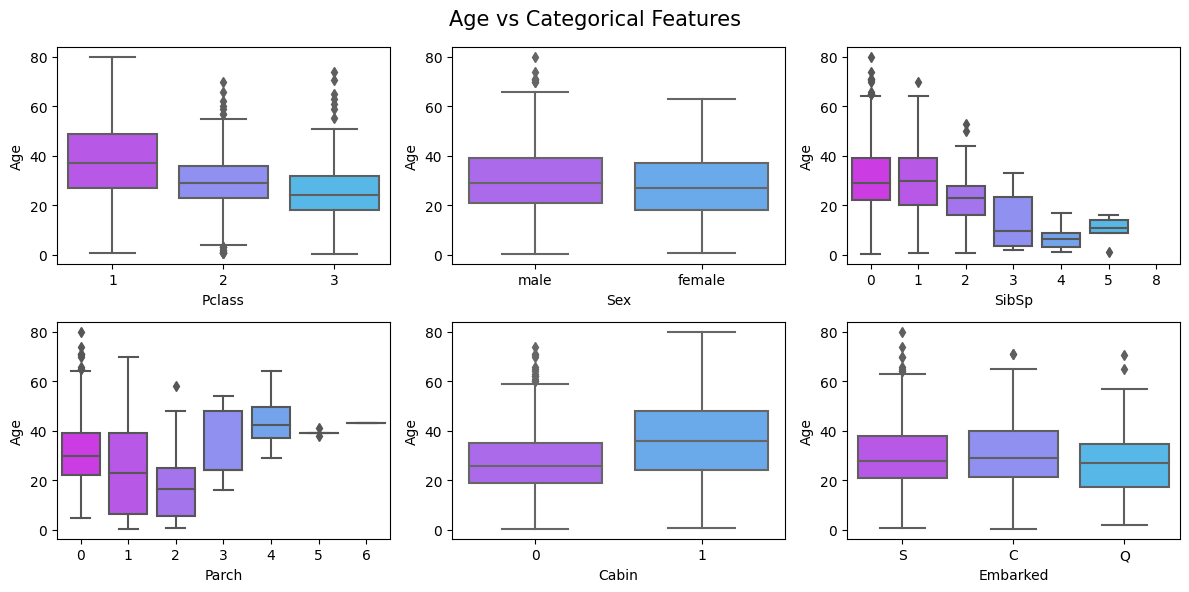

In [17]:
############ Age ###############

feat = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']

fig, ax = plt.subplots(2, 3, figsize=(12,6), dpi=100)
for idx, feat in enumerate(feat):
    #box plot Age vs. Every Feature
    sns.boxplot(x=feat, y='Age', data=train, ax=ax[idx//3, idx%3], palette='cool_r')
      
plt.suptitle('Age vs Categorical Features', fontsize=15)
plt.tight_layout()
plt.show()

In [18]:
train.corr().Age.sort_values() 
#the most strong correlation is with P-class

Pclass     -0.369226
SibSp      -0.308247
Parch      -0.189119
Survived   -0.077221
Fare        0.096067
Cabin       0.249732
Age         1.000000
Name: Age, dtype: float64

In [19]:
#Replace the missing values of age with the median age of the passenger's P-class.
print('Train \n' , train.groupby('Pclass').Age.median())
print('*'*20)
print('*'*20)
print('Test \n', test.groupby('Pclass').Age.median())

Train 
 Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64
********************
********************
Test 
 Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64


In [20]:
train['Age'] = train.groupby('Pclass').Age.transform(lambda x: x.fillna(x.median()))
train['Age'] = train.Age.astype(int)
test['Age'] = test.groupby('Pclass').Age.transform(lambda x: x.fillna(x.median()))
test['Age'] = test.Age.astype(int)

In [21]:
############ Embarked ###############
#Because the percentage of missing values for Embarked is so low, they will be replaced by the mode.
train['Embarked'] = train.Embarked.fillna(train.Embarked.mode()[0])

In [22]:
############ Fare ###############
# Because the percentage of missing values for Fare is so low, will be replaced by the mean of its class.
test['Fare'] = test.groupby('Pclass').Fare.transform(lambda x: x.fillna(x.mean()))

# Data Engeneering

In [23]:
############## Title ##################
# Extract the title of the names

train['Title'] = train.Name.str.extract('([A-Za-z]+)\.')[0]
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.')[0]

print(train['Title'].value_counts())
print('*'*30)
print(test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
******************************
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [24]:
# grouping less common titles into another category
others = ['Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer' ,'Dona']
train["Title"] = np.where(train['Title'].isin(others), 'Others', train['Title'])
test["Title"] = np.where(test['Title'].isin(others), 'Others', test['Title'])

In [25]:
############## Family ##################
#Group the families into another column to measure the size of the families. 
#Create a new feature to categorize if the passenger travels with or without family.

train['FamilySize'] = train.Parch + train.SibSp + 1
test['FamilySize'] = test.Parch + test.SibSp + 1

train['IsAlone'] = np.where(train.FamilySize==1, 1, 0)
test['IsAlone'] = np.where(test.FamilySize==1, 1, 0)

In [26]:
############## Age Bins ##################
# Divide the Age into bins (common groups of ages) to convert it to a categorical variable.
# Infant: 0-1
# Child: 1-13
# Adolescent: 14-17
# YoungAdult: 18-25
# Adult: 26-55
# Elder: 56-80

train['AgeBins'] = pd.cut(train.Age, [-1,1, 13, 17, 25, 55, 81], labels=['Infant', 'Child', 'Adolescent', 'YoungAdult', 'Adult', 'Elder'])
test['AgeBins'] = pd.cut(test.Age, [-1,1, 13, 17, 25, 55, 81], labels=['Infant', 'Child', 'Adolescent', 'YoungAdult', 'Adult', 'Elder'])

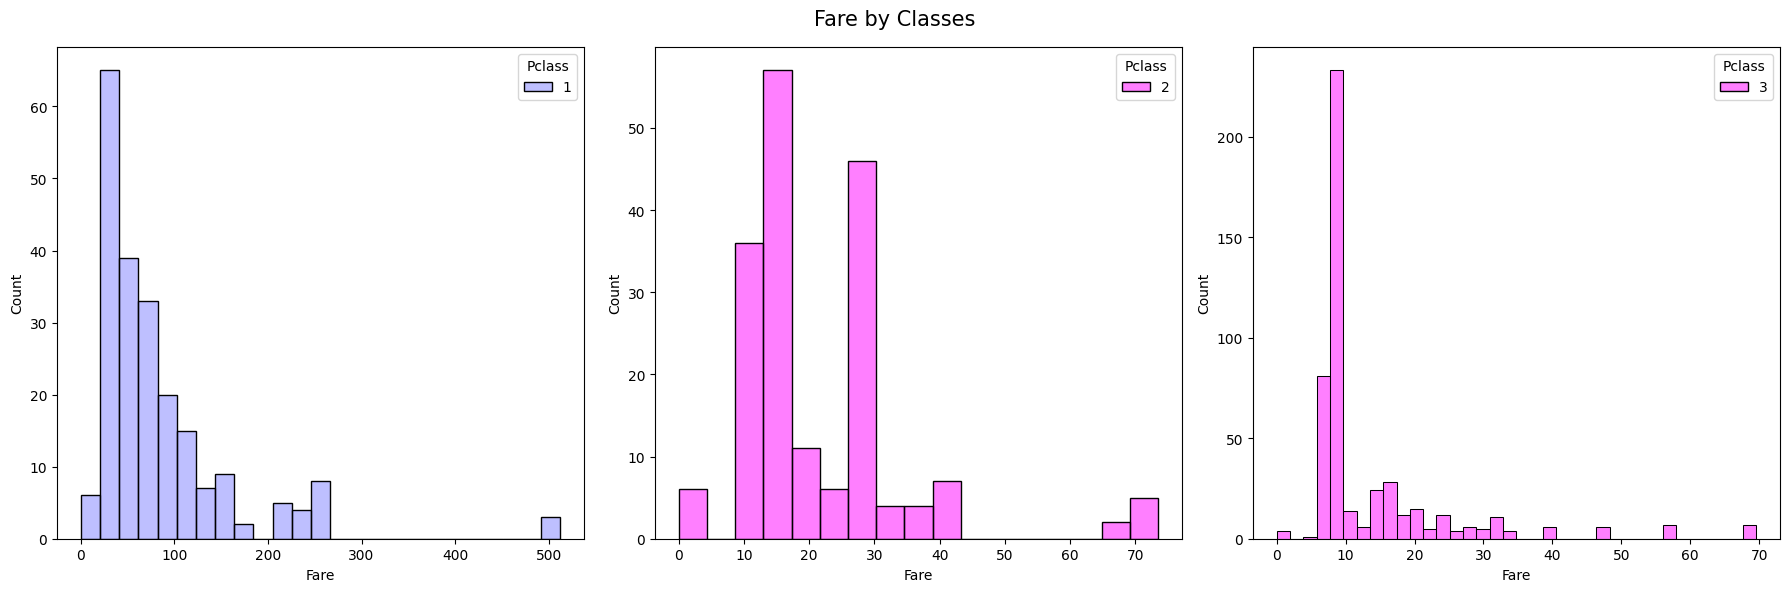

In [27]:
############## Fare ##################

fig, ax = plt.subplots(1,3, figsize=(18,6), dpi=100)

sns.histplot(x='Fare', data=train[train.Pclass==1], hue='Pclass', palette='cool_r', ax=ax[0])
sns.histplot(x='Fare', data=train[train.Pclass==2], hue='Pclass', palette='cool_r', ax=ax[1])
sns.histplot(x='Fare', data=train[train.Pclass==3], hue='Pclass', palette='cool_r', ax=ax[2])


plt.suptitle('Fare by Classes', fontsize=15)
plt.tight_layout()
plt.show()

In [28]:
# Only first-class passengers paid more than 80.
# Second-class passengers paid between 10 and 30.
# And third-class ones paid less than 10.

train['FareBins'] = pd.cut(train.Fare, [-1, 10, 20, 30, 80, 520])
test['FareBins'] = pd.cut(test.Fare, [-1, 10, 20, 30, 80, 520])

In [29]:
############ Categorical DataFrames ###############
train_cat = train[['Survived', 'Pclass', 'Sex', 'Title', 'AgeBins', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Cabin', 'Embarked', 'FareBins']].copy()
test_cat = test[['Pclass', 'Sex', 'Title', 'AgeBins', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Cabin', 'FareBins', 'Embarked']].copy()
train_cat.head()

,Survived,Pclass,Sex,Title,AgeBins,SibSp,Parch,FamilySize,IsAlone,Cabin,Embarked,FareBins
PassengerId,,,,,,,,,,,,
1,0,3,male,Mr,YoungAdult,1,0,2,0,0,S,"(-1, 10]"
2,1,1,female,Mrs,Adult,1,0,2,0,1,C,"(30, 80]"
3,1,3,female,Miss,Adult,0,0,1,1,0,S,"(-1, 10]"
4,1,1,female,Mrs,Adult,1,0,2,0,1,S,"(30, 80]"
5,0,3,male,Mr,Adult,0,0,1,1,0,S,"(-1, 10]"


#### Correlation of Survived with the rest of the features

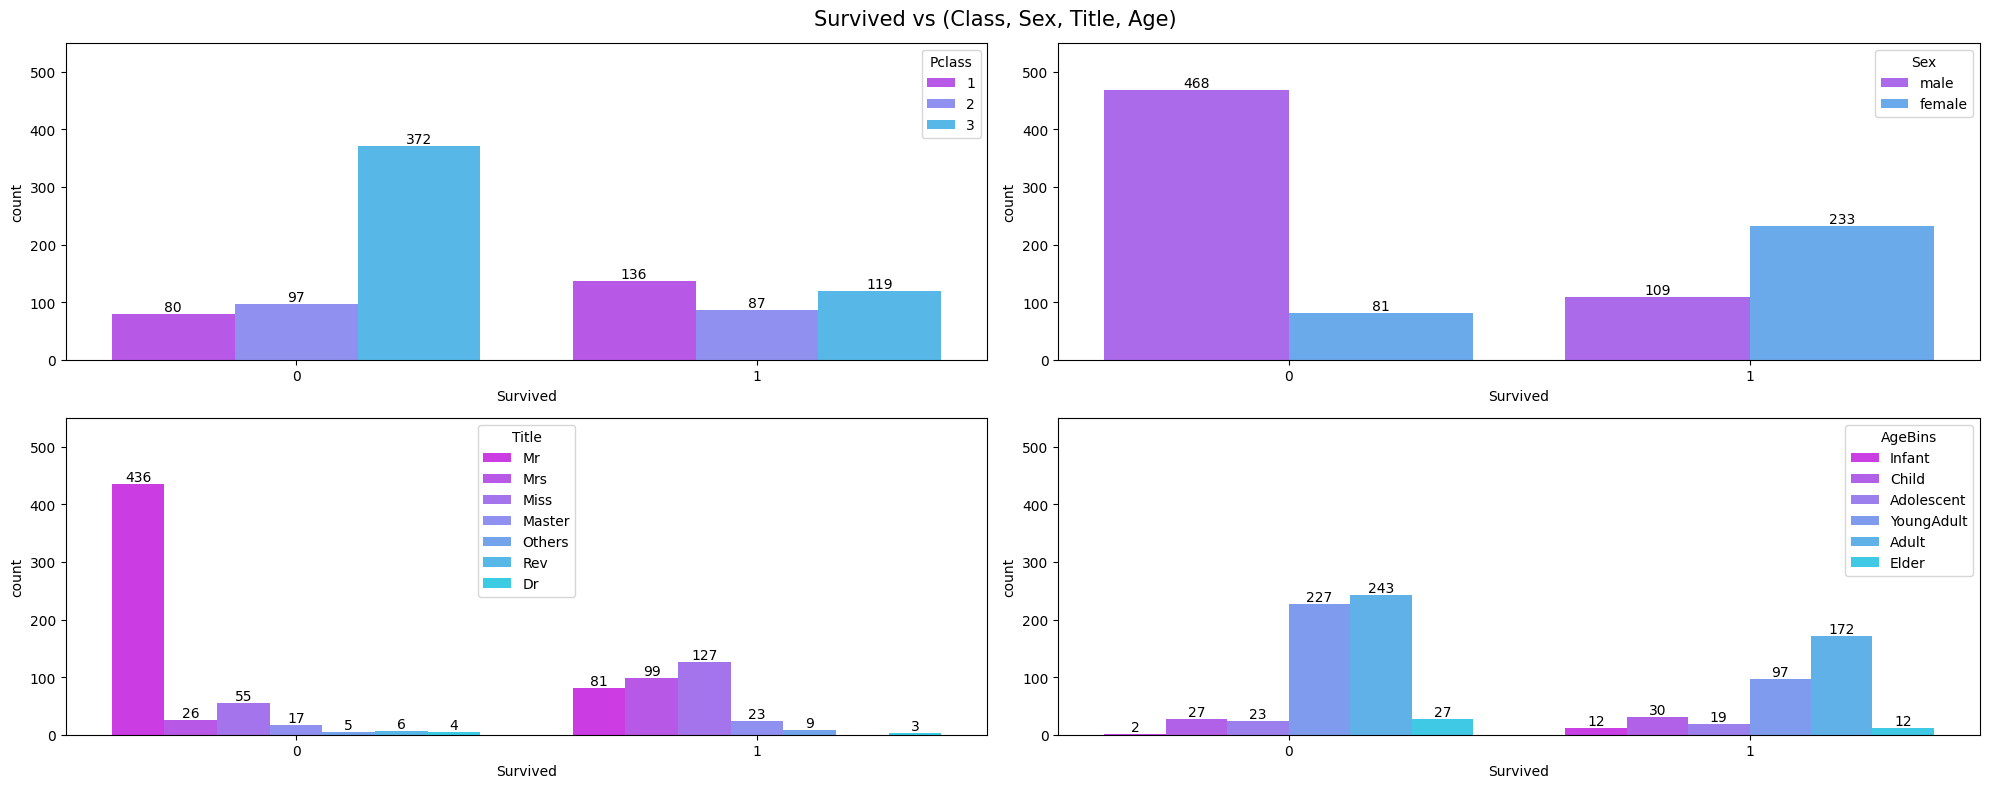

In [30]:
############ Survived vs Other Feautures ###############
col = 2
fig, ax = plt.subplots(2, col, figsize=(20,8), dpi=100)

for idx, feat in enumerate(train_cat.columns[1:5]):
    graph = sns.countplot(x='Survived', data=train, hue=feat, palette='cool_r', ax=ax[idx//col, idx%col])
    ax[idx//col, idx%col].set_ylim([0,550])
    for count in graph.containers:
        graph.bar_label(count)
        
plt.suptitle('Survived vs (Class, Sex, Title, Age)', fontsize=15)
plt.tight_layout()
plt.show()

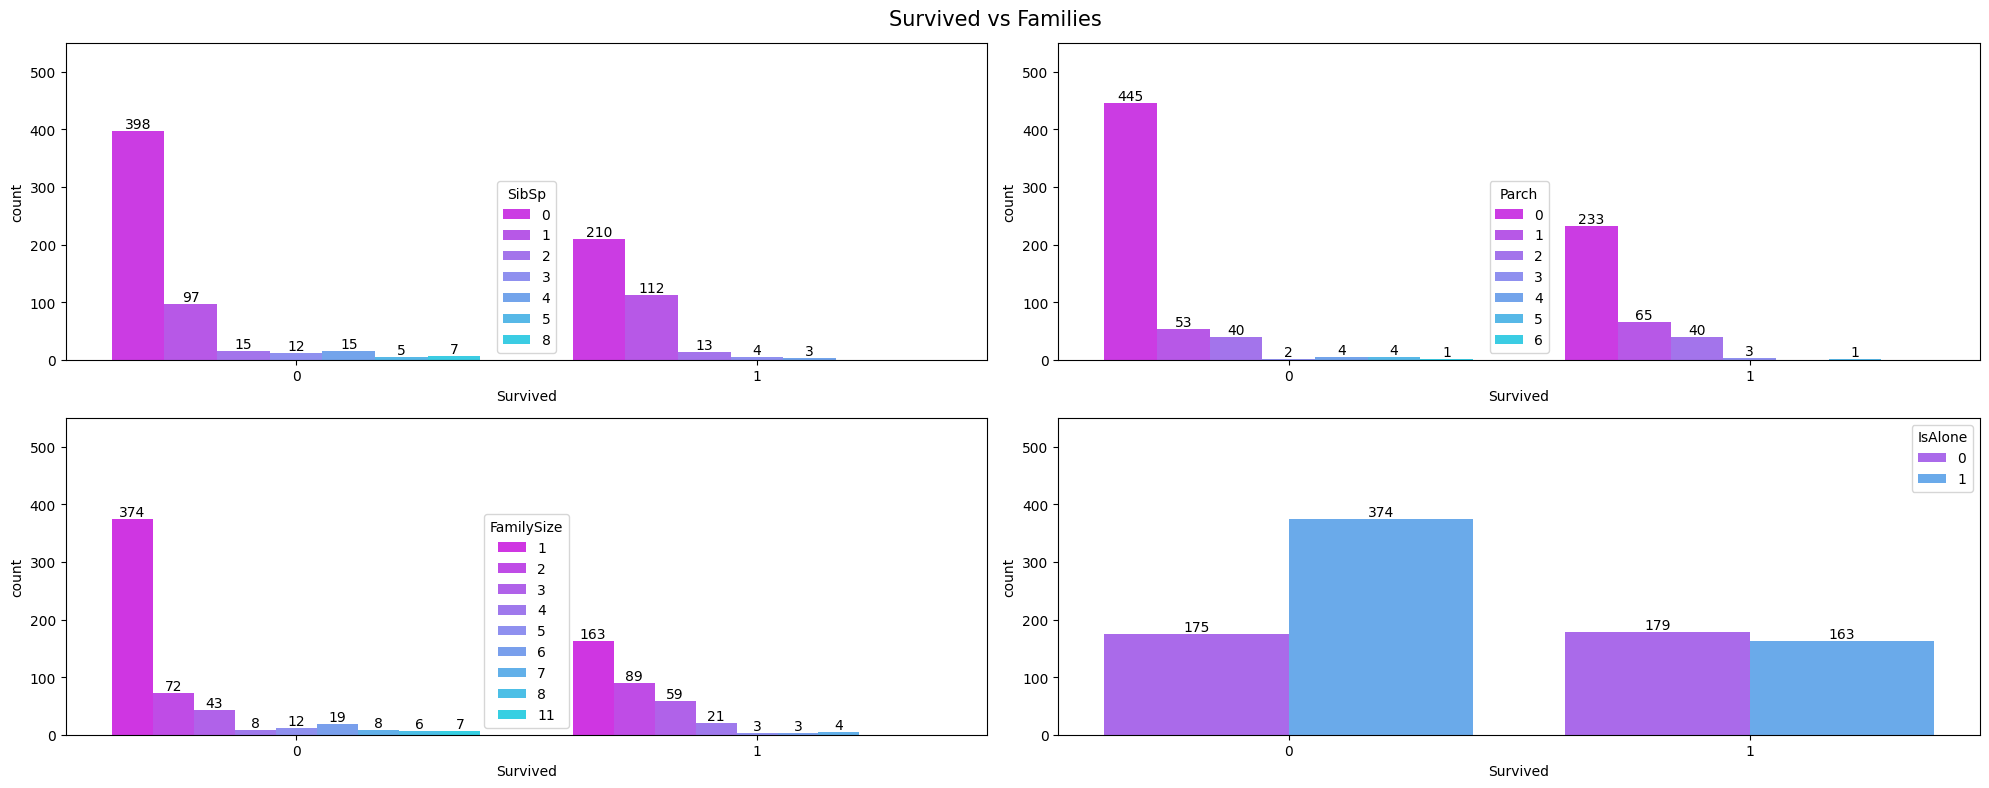

In [31]:
col = 2
fig, ax = plt.subplots(2, col, figsize=(20,8), dpi=100)

for idx, feat in enumerate(train_cat.columns[5:9]):
    graph = sns.countplot(x='Survived', data=train, hue=feat, palette='cool_r', ax=ax[idx//col, idx%col])
    ax[idx//col, idx%col].set_ylim([0,550])
    for count in graph.containers:
        graph.bar_label(count)
        
plt.suptitle('Survived vs Families', fontsize=15)
plt.tight_layout()
plt.show()

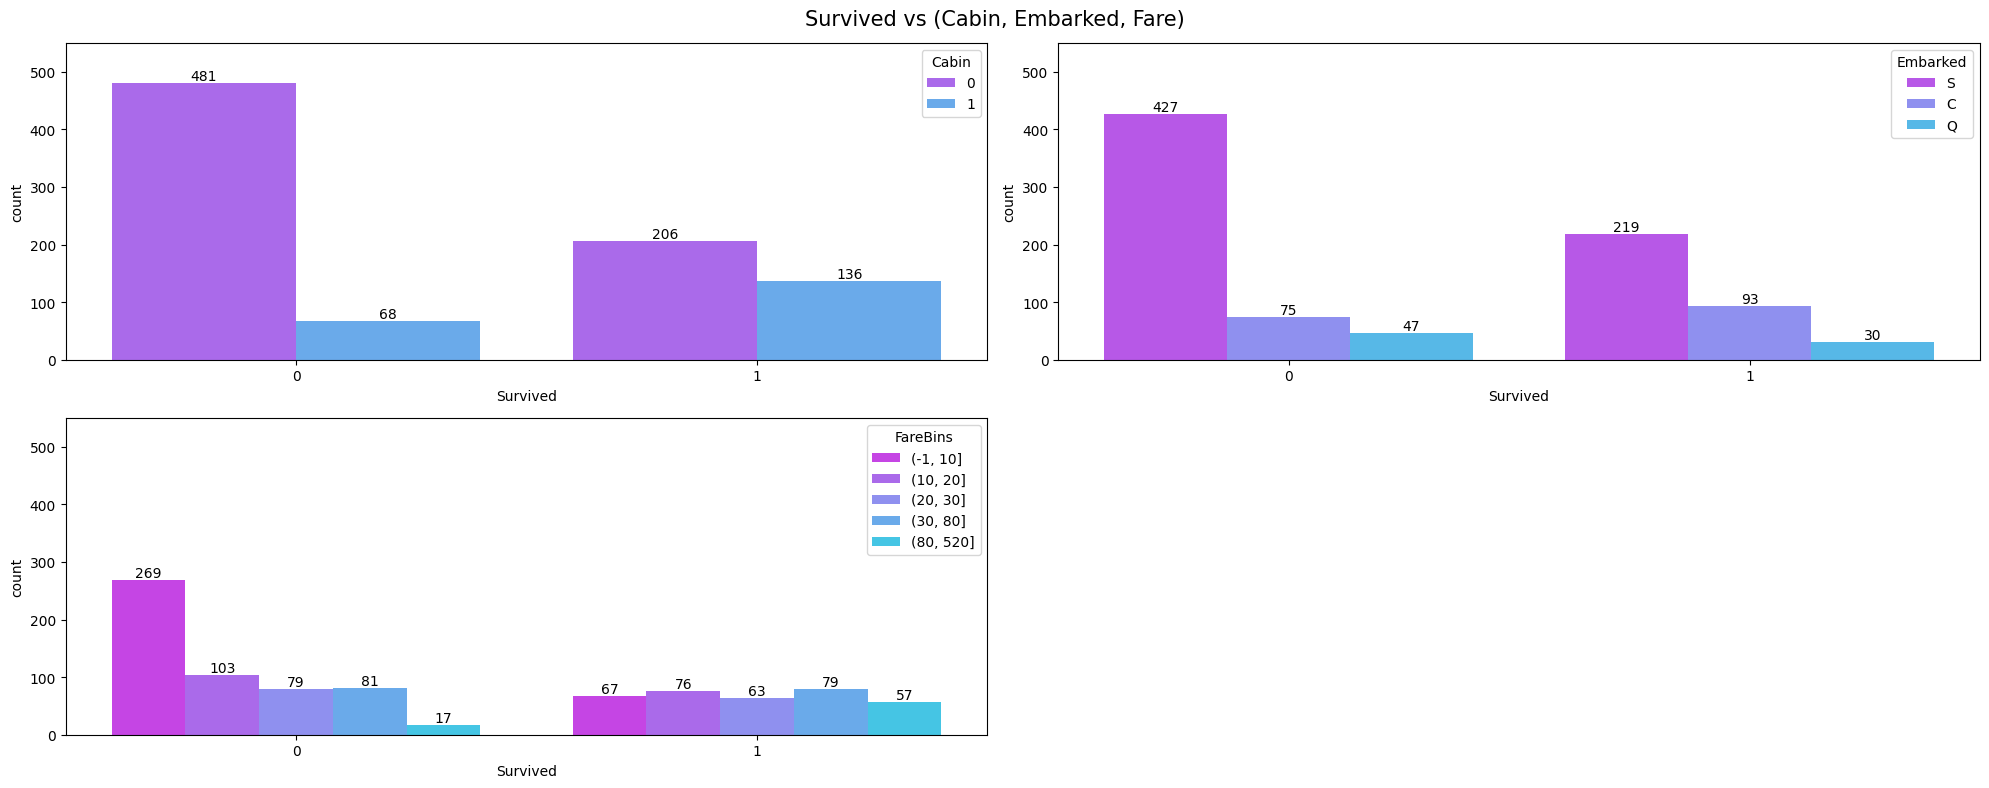

In [32]:
col = 2
fig, ax = plt.subplots(2, col, figsize=(20,8), dpi=100)

for idx, feat in enumerate(train_cat.columns[9:12]):
    graph = sns.countplot(x='Survived', data=train, hue=feat, palette='cool_r', ax=ax[idx//col, idx%col])
    ax[idx//col, idx%col].set_ylim([0,550])
    for count in graph.containers:
        graph.bar_label(count)
ax[1,1].axis('off')        
plt.suptitle('Survived vs (Cabin, Embarked, Fare)', fontsize=15)
plt.tight_layout()
plt.show()

In [33]:
################ Correlation Between Survived and All Featuress #####################
from scipy.stats import chi2_contingency
p_values = []

# Create a contingency table
for column in train_cat.columns[1:]:
    table = pd.crosstab(train[column], train.Survived)

# Perform the chi-squared test for independence for each input variable
    chi2, p, dof, expected = chi2_contingency(table)
    p_values.append({'Feature':column, 'p_value':p, 'Stat': chi2})

# Print the p-values
pvalues_df = pd.DataFrame(p_values).set_index('Feature').sort_values('p_value')
pvalues_df

,p_value,Stat
Feature,,
Title,8.194505e-60,290.660548
Sex,1.197357e-58,260.717020
Pclass,4.549252e-23,102.888989
FareBins,3.812507e-22,106.626710
Cabin,6.741970e-21,87.941486
FamilySize,3.579669e-14,80.672313
IsAlone,1.972654e-09,36.000514
SibSp,1.558581e-06,37.271793
Embarked,2.300863e-06,25.964453


In [34]:
########### Encode data to apply feature selection ############
# columns_to_factorize = ['Sex', 'Title', 'Embarked', 'AgeBins', 'FareBins']
# # Factorize the selected columns
# train_cat[columns_to_factorize] = train_cat[columns_to_factorize].apply(lambda x: pd.factorize(x)[0])
# test_cat[columns_to_factorize] = test_cat[columns_to_factorize].apply(lambda x: pd.factorize(x)[0])

# test_cat.head()

In [35]:
# #################### Feature Selection ###########################
# from sklearn.feature_selection import SelectKBest, mutual_info_classif
# from sklearn.feature_selection import f_classif

# fs = SelectKBest(score_func=f_classif, k=5)

# # apply feature selection
# Selected_train = fs.fit_transform(train_cat.iloc[:,1:], train_cat["Survived"])
# selected_features = train_cat.iloc[:,1:].columns[fs.get_support()]

# # Print the selected features
# print("Selected features:", selected_features)

#### Data Selection and Preparation

In [36]:
X = train_cat[['Pclass', 'Sex', 'Title', 'Cabin', 'FareBins', 'FamilySize']]
y = train_cat['Survived']
X_test = test_cat[['Pclass', 'Sex', 'Title', 'Cabin', 'FareBins', 'FamilySize']]
X.head()

,Pclass,Sex,Title,Cabin,FareBins,FamilySize
PassengerId,,,,,,
1,3,male,Mr,0,"(-1, 10]",2
2,1,female,Mrs,1,"(30, 80]",2
3,3,female,Miss,0,"(-1, 10]",1
4,1,female,Mrs,1,"(30, 80]",2
5,3,male,Mr,0,"(-1, 10]",1


In [37]:
X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Title', 'FareBins', 'FamilySize'])
X_test = pd.get_dummies(X_test, columns=['Pclass', 'Sex', 'Title', 'FareBins', 'FamilySize'])
X.shape, X_test.shape

((891, 27), (418, 27))

### MODELING

* Logistic Regression: Logistic regression is a statistical method that is used for binary and multi-class classification problems. It models the probability of an instance belonging to a particular class.

* Naive Bayes: Naive Bayes is a probabilistic algorithm that is based on Bayes’ theorem. It is particularly useful for text classification problems. The most popular variant of Naive Bayes is the Gaussian Naive Bayes.

* Decision Trees: Decision Trees are a type of supervised learning algorithm that are used for both classification and regression problems. They are used to model the decision-making process of a problem.

* Random Forest: Random Forest is an extension of Decision Trees that uses a combination of multiple decision trees to make predictions. It is considered to be a highly accurate and robust algorithm.

* Support Vector Machines (SVMs): SVMs are a set of supervised learning algorithms that can be used for both classification and regression problems. They are particularly useful for problems where the number of features is greater than the number of instances.

* K-Nearest Neighbors (K-NN): K-NN is a non-parametric algorithm that is used for classification and regression problems. It stores all available cases and classifies new cases based on a similarity measure.

* Neural Networks: Neural Networks are a set of algorithms that are inspired by the structure and function of the human brain. They are used for both classification and regression problems.

* AdaBoost: AdaBoost is an ensemble algorithm that combines multiple weak classifiers to form a strong classifier. It iteratively adjusts the weights of the instances in the dataset to give more importance to the misclassified instances.

* Gradient Boosting: Gradient Boosting is an ensemble algorithm that combines multiple weak classifiers to form a strong classifier. It works by building the classifiers in a stage-wise fashion, where each stage is designed to correct the errors of the previous stage.

In [38]:
# Determine the level of balancing of each class to choose the best metric to measure the accuracy.

class_counts = y.value_counts()
class_proportions = class_counts / class_counts.sum()

print(class_proportions)

0    0.616162
1    0.383838
Name: Survived, dtype: float64


If your dataset is imbalanced, it's common to use metrics that take into account both the true positive and the false positive rates such as precision, recall, F1-score, AUC-ROC, etc.

Here is a brief explanation of some of these metrics:

Precision: Precision is the number of true positive predictions divided by the total number of positive predictions. It measures how many of the positive predictions were actually correct.

Recall (or Sensitivity or TPR): Recall is the number of true positive predictions divided by the total number of actual positive instances. It measures how many of the actual positive instances were correctly predicted.

F1-score: F1-score is the harmonic mean of precision and recall. It balances both metrics and gives more weight to the lower value.

AUC-ROC : AUC-ROC is the area under the receiver operating characteristic curve. It measures the ability of the classifier to distinguish between positive and negative classes.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix

In [40]:
# Stratified k-fold cross-validation is a variation of k-fold cross-validation where the folds are created in a 
# way that preserves the percentage of samples for each class. This is particularly useful when the data is 
# imbalanced, which means that one class has more samples than the other. This way the model will be trained on a 
# balanced set of samples, thus avoiding the model to be biased towards the class with more samples.

# Define the seed for reproducibility
seed = 42

clfs = [LogisticRegression(max_iter=1000), GaussianNB(), DecisionTreeClassifier(), SVC(), 
        KNeighborsClassifier(), MLPClassifier(max_iter=500), LinearDiscriminantAnalysis(), 
          RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

models = ['LogisticRegression', 'GaussianNB', 'DecisionTreeClassifier', 'SVC', 'KNeighborsClassifier', 
          'MLPClassifier', 'LinearDiscriminantAnalysis', 'RandomForestClassifier', 'AdaBoostClassifier',
          'GradientBoostingClassifier']
scs = []

# Create an instance of the StratifiedKFold class
skf = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

for clf in clfs:
    scores = cross_val_score(clf, X, y, cv=skf, scoring='f1_micro')
    scs.append((scores.mean(), scores.std()))

cv_scores = pd.DataFrame(data=scs, index=models, columns=['f1_mean', 'f1_std']).sort_values('f1_mean', ascending=False)

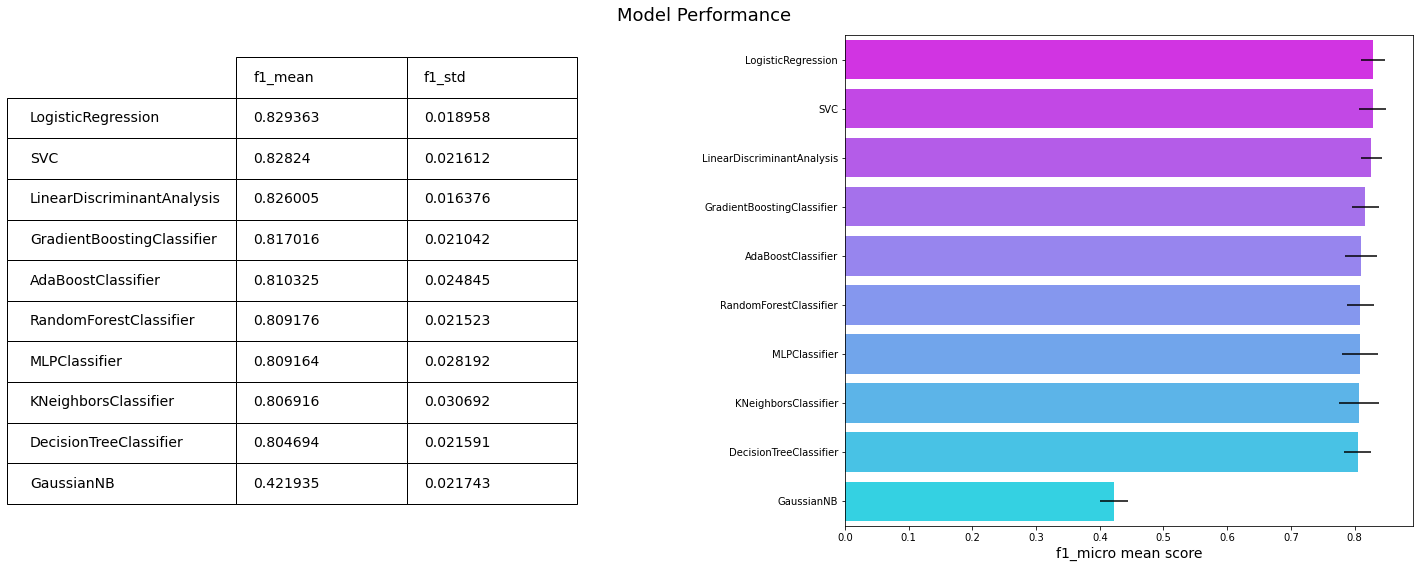

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(cellText=np.round(cv_scores.values, 6),colLabels=cv_scores.columns, loc='center',cellLoc='left',
          colLoc='left',rowLabels=cv_scores.index, colWidths=[0.15,0.15])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='f1_mean', y=cv_scores.index, data=cv_scores, orient="h", xerr=cv_scores['f1_std'], ax=ax2 , palette='cool_r')
ax2.set_xlabel('f1_micro mean score', fontsize=14)

plt.suptitle('Model Performance', fontsize=18)
plt.tight_layout()
plt.show()


#### Model Optimization

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=3)

Best parameters:  {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.8316104868913857
Score with subset of test data 0.762589928057554


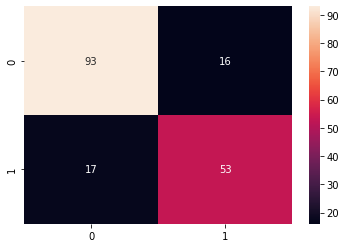

In [43]:
#######################################################################
#                                  SVC
#######################################################################

svc_param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                  'C': [0.1, 1, 10],
                  'degree': [2,3],
                  'gamma': [0.1, 1, 10]}

svc = SVC(probability=True)

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(svc, svc_param_grid, cv=skf, scoring='f1_micro')
grid_search.fit(X, y)
svc_best = grid_search.best_estimator_

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_, end='\n')

# Make predictions on the test data
svc = SVC(probability=True, **grid_search.best_params_).fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

# Calculate the F1-score on test data
f1 = f1_score(ytest, y_pred)
print("Score with subset of test data", f1, end='\n')

# Create the confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Best parameters:  {'solver': 'svd'}
Best score:  0.8260049937578027
Score with subset of test data 0.762589928057554


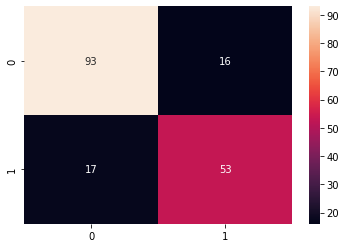

In [44]:
#######################################################################
#                  Linear Discriminant Analysis (LDA)
#######################################################################

lda_param_grid = {'solver' : ['svd', 'lsqr',]}
                
lda = LinearDiscriminantAnalysis()

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(lda, lda_param_grid, cv=skf, scoring='f1_micro')
grid_search.fit(X, y)
lda_best = grid_search.best_estimator_

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_, end='\n')

# Make predictions on the test data
lda = LinearDiscriminantAnalysis( **grid_search.best_params_).fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

# Calculate the F1-score on test data
f1 = f1_score(ytest, y_pred)
print("Score with subset of test data", f1, end='\n')

# Create the confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Best parameters:  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'n_estimators': 300}
Best score:  0.8282397003745319
Score with subset of test data 0.762589928057554


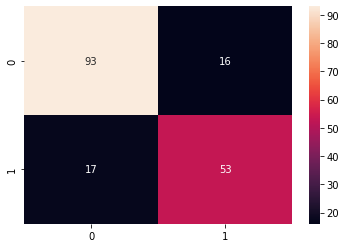

In [45]:
#######################################################################
#                  Gradient Boosting Classifier
#######################################################################

gbc_param_grid  = {'loss': ["deviance", "exponential"],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'n_estimators': [100, 200, 300, 500, 600],
                  'max_depth': [1, 3, 5, 7]}
                
gbc = GradientBoostingClassifier()

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(gbc, gbc_param_grid, cv=skf, scoring='f1_micro')
grid_search.fit(X, y)
gbc_best = grid_search.best_estimator_

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_, end='\n')

# Make predictions on the test data
gbc = GradientBoostingClassifier( **grid_search.best_params_).fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

# Calculate the F1-score on test data
f1 = f1_score(ytest, y_pred)
print("Score with subset of test data", f1, end='\n')

# Create the confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Best parameters:  {'C': 1, 'solver': 'liblinear'}
Best score:  0.8293632958801499
Score with subset of test data 0.762589928057554


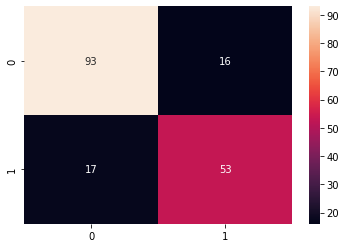

In [46]:
#######################################################################
#                           Logistic Regression
#######################################################################

logreg_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
#                      'penalty': ['l1', 'l2'], 
                     'solver': ['liblinear', 'saga', 'lbfgs','sag', 'newton-cg' ],}

logreg = LogisticRegression(max_iter=1000)

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(logreg, logreg_param_grid, cv=skf, scoring='f1_micro')
grid_search.fit(X, y)
logreg_best = grid_search.best_estimator_

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_, end='\n')

# Make predictions on the test data
logreg =  LogisticRegression(max_iter=1000, **grid_search.best_params_).fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

# Calculate the F1-score on test data
f1 = f1_score(ytest, y_pred)
print("Score with subset of test data", f1, end='\n')

# Create the confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best score:  0.827116104868914
Score with subset of test data 0.762589928057554


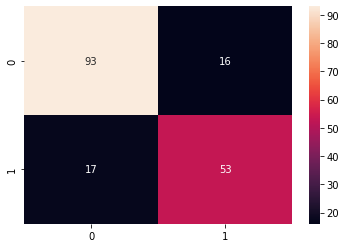

In [47]:
#######################################################################
#                      Random Forest Classifier
#######################################################################


rfc_param_grid = {'n_estimators': [10, 100, 500],
              'max_depth': [2, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             }

rfc = RandomForestClassifier()

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(rfc, rfc_param_grid, cv=skf, scoring='f1_micro')
grid_search.fit(X, y)
rfc_best = grid_search.best_estimator_

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_, end='\n')

# Make predictions on the test data
rfc = RandomForestClassifier( **grid_search.best_params_).fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

# Calculate the F1-score on test data
f1 = f1_score(ytest, y_pred)
print("Score with subset of test data", f1, end='\n')

# Create the confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#### Model Building and Results Prediction

In [48]:
from sklearn.ensemble import VotingClassifier
# , ('lda', lda_best)
voting_clf = VotingClassifier([('logreg', logreg_best), ('svc', svc_best), ('gbc', gbc_best), ('rfc', rfc_best)], 
                              voting='soft')
voting_clf = voting_clf.fit(X, y)

ypred = voting_clf.predict(X_test)

In [49]:
# lda=lda_best.fit(X,y)
# ypred=lda.pre

In [50]:
submission = pd.DataFrame({'PassengerId': test.index, 'Survived': ypred})
submission.to_csv('Submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
